In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

In [2]:
sheetid ="1yzfwp9MzAqGSWw4GTDDNPnQosUUpUR7nVEPrn1DiBNE"

sheet_name = "Dashboard" #this comes from the google sheet

In [3]:
#inserting the sheetid and sheet_name
gsheet_url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(sheetid, sheet_name)


In [10]:
from datetime import date
d1 = date.today()
date = [d1.month, d1.day, d1.year]

In [4]:
sch_data = pd.read_csv(gsheet_url)

In [5]:
#imported data has a bunch of 'Unnamed' empty columns
sch_data = sch_data.loc[:, ~sch_data.columns.str.contains('^Unnamed')]

In [6]:
#change name of first column
sch_data = sch_data.rename(columns={"2021-2022 COVID-19 DASHBOARD ":"schools"}) #there's a space after DAHSBOARD

In [7]:
#make schools the index
sch_index = sch_data.set_index("schools")

In [8]:
#make nas 0
sch_index = sch_index.fillna(0)

In [9]:
#keep only the rows with school or office names (not using indexes incase they change the spreadsheet)
sch_index = sch_index.loc[["Highland Park",
                      "Richmond",
                      "Sangre Ridge",
                      "Skyline",
                      "Westwood",
                      "Will Rogers",
                      "SMS",
                      "SJHS",
                      "SHS",
                      "Lincoln Academy",
                      "Virtual Academy",
                      "Facilities",
                      "Child Nutrition***",
                      "Transportation",
                      "Technology",
                      "Central Office",
                      "Other (Multiple sites)",
                      "Total"]]

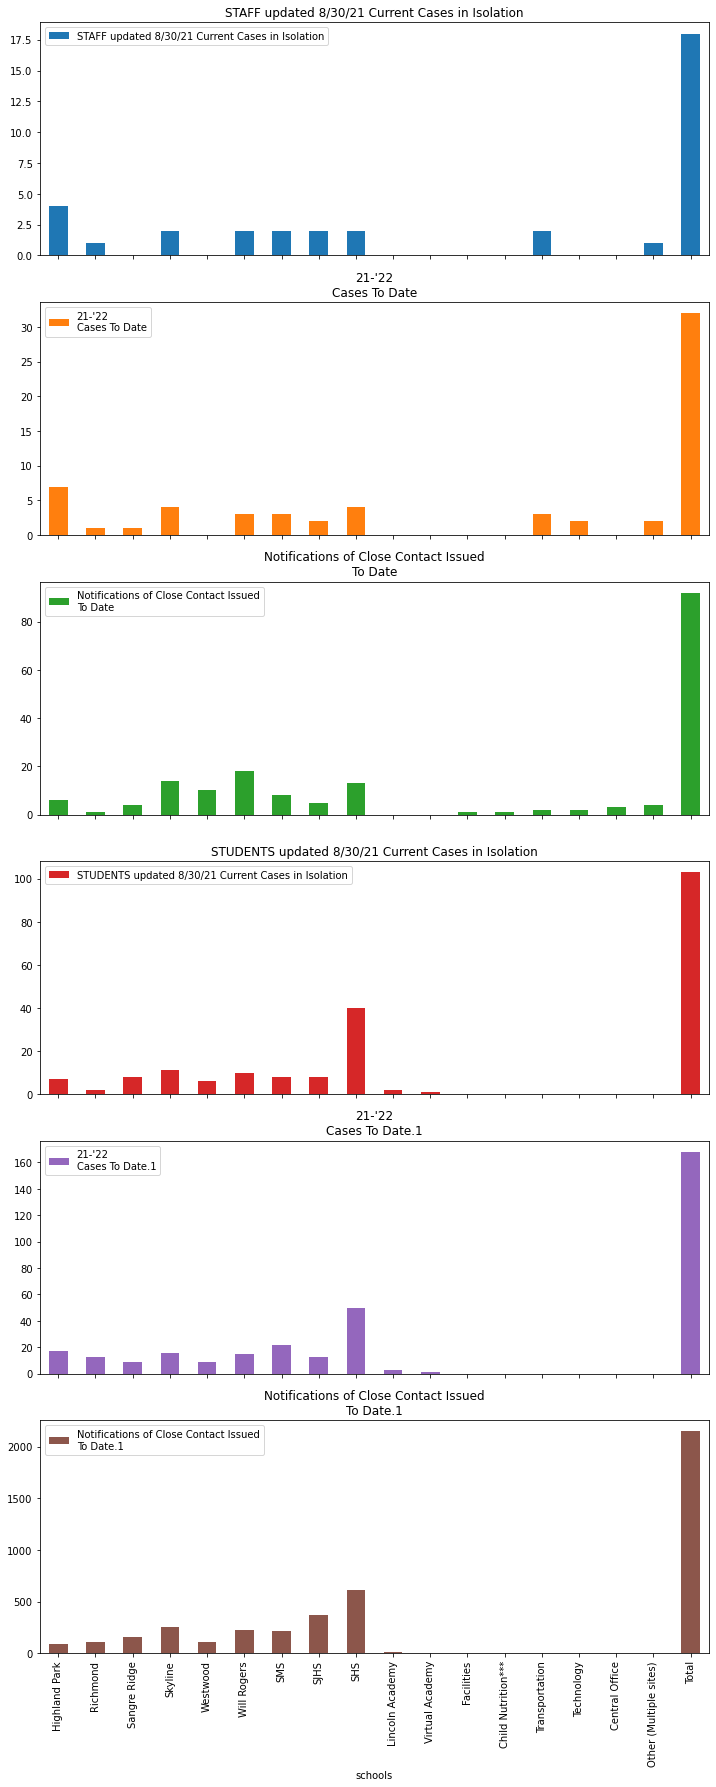

In [11]:
fig = sch_index.plot.bar(figsize=(12,30), subplots=True)
fig = fig[0].get_figure()
fig.savefig("first_plot.png")

In [12]:
staff = sch_index[["STAFF updated 8/30/21 Current Cases in Isolation", "21-'22\nCases To Date", "Notifications of Close Contact Issued\nTo Date"]]

students = sch_index[["STUDENTS updated 8/30/21 Current Cases in Isolation", "21-'22\nCases To Date.1", "Notifications of Close Contact Issued\nTo Date.1"]]




,STUDENTS updated 8/30/21 Current Cases in Isolation,21-'22\nCases To Date.1,Notifications of Close Contact Issued\nTo Date.1
schools,,,
Highland Park,7.0,17.0,92.0
Richmond,2.0,13.0,105.0
Sangre Ridge,8.0,9.0,154.0
Skyline,11.0,16.0,250.0
Westwood,6.0,9.0,113.0


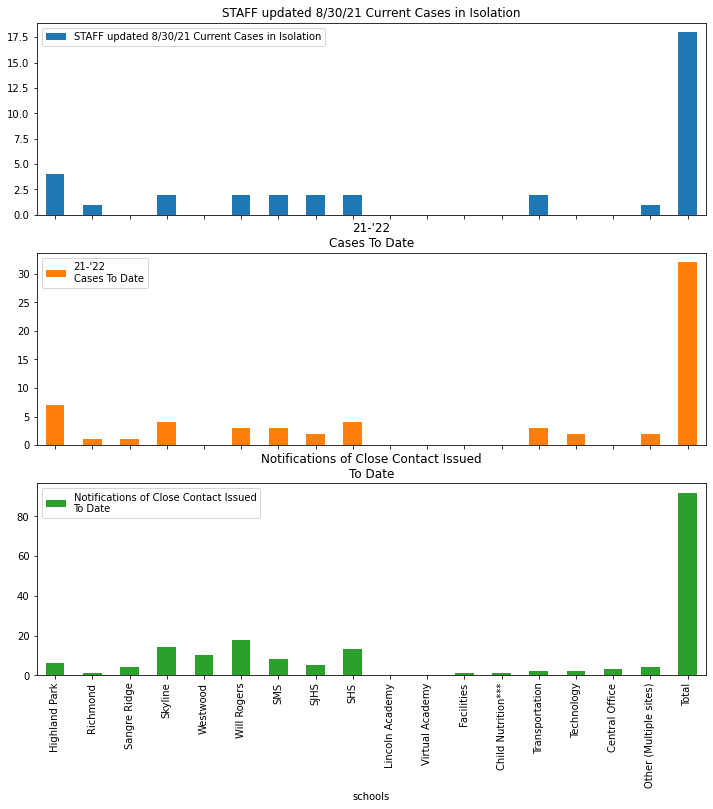

In [17]:
fig1 = staff.plot.bar(figsize=(12,12), subplots=True)
fig1 = fig1[0].get_figure()
fig1.savefig("staff_plot.png")

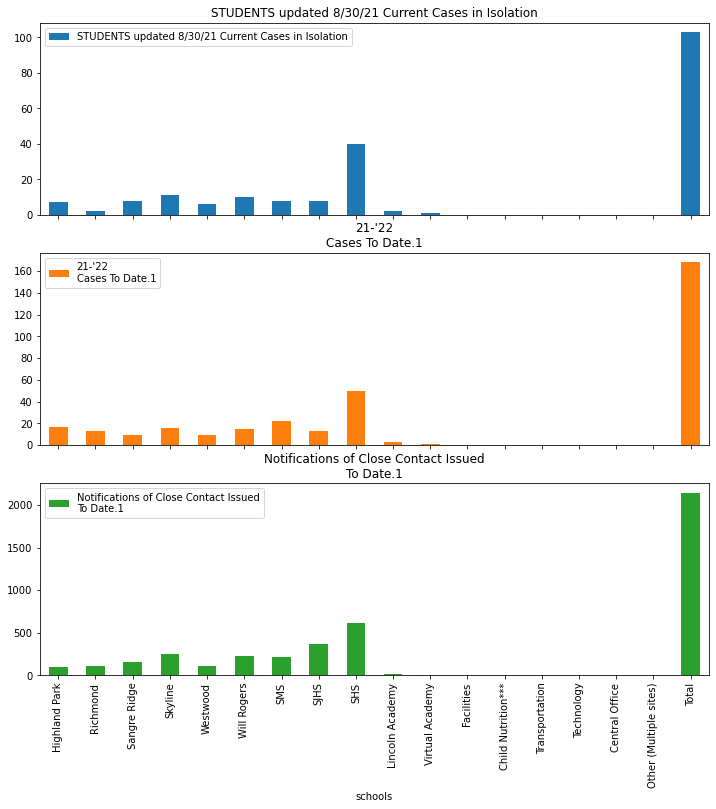

In [16]:
fig2 = students.plot.bar(figsize=(12,12), subplots=True)
fig2 = fig2[0].get_figure()
fig2.savefig("student_plot.png")

In [ ]:
#save each column as its own dataframe in preparation to add the column from the next day's data
staff_isolation = pd.DataFrame(sch_index["STAFF updated 8/30/21 Current Cases in Isolation"])
staff_isolation_date = staff_isolation.rename(columns={"STAFF updated 8/30/21 Current Cases in Isolation": "{}".format(date)})

staff_cases = pd.DataFrame(sch_index["21-'22\nCases To Date"])
staff_cases_date = staff_cases.rename(columns={"21-'22\nCases To Date": "{}".format(date)})

staff_contact = pd.DataFrame(sch_index["Notifications of Close Contact Issued\nTo Date"])
staff_contact_date = staff_contact.rename(columns={"Notifications of Close Contact Issued\nTo Date": "{}".format(date)})

students_isolation = pd.DataFrame(sch_index["STUDENTS updated 8/30/21 Current Cases in Isolation"])
students_isolation_date = students_isolation.rename(columns={"STUDENTS updated 8/30/21 Current Cases in Isolation": "{}".format(date)})

students_cases = pd.DataFrame(sch_index["21-'22\nCases To Date.1"])
students_cases_date = students_cases.rename(columns={"21-'22\nCases To Date.1": "{}".format(date)})

students_contact = pd.DataFrame(sch_index["Notifications of Close Contact Issued\nTo Date.1"])
students_contact_date = students_contact.rename(columns={"Notifications of Close Contact Issued\nTo Date.1": "{}".format(date)})
